# Central Limit Theorem a-la Taleb

From Nassim Nicholas Taleb's demonstration of the Central Limit Theorem in conversation with Stephen Wolfram: https://youtu.be/_8j1XZ0N_wE
Using the Python ecosystem rather than Mathematica.


In [1]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [2]:
# We consider a uniform continuous random variable. In the standard form, the distribution is uniform on [0, 1].
mean, var, skew, kurt = uniform.stats(moments='mvsk')
print(f'mean: {mean}, var: {var}, skew: {skew}, kurt: {kurt}')

mean: 0.5, var: 0.08333333333333333, skew: 0.0, kurt: -1.2


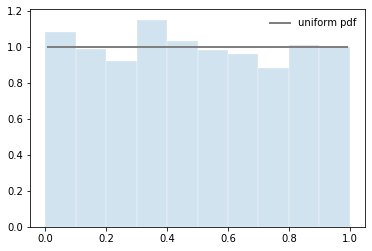

In [3]:
# Generate random numbers and plot them (binned) in a histogram:
r = uniform.rvs(size=1000)
x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, uniform.pdf(x), color='grey', lw=2, label='uniform pdf')
ax.hist(r, density=True, alpha=0.2, edgecolor='white', linewidth=1.5)
ax.legend(loc='best', frameon=False)
plt.show()

#### We will now show the Central Limit Theorem for samples from a uniform distribution

In [4]:
def sample_uniform(size=1000, num=4):
    """Generate random numbers by sampling uniform distribution
    size - number of samples taken per collection (int)
    num - number of collections"""
    # Generate random numbers:
    a = list(range(num))
    for n in range(num):
        a[n] = uniform.rvs(size=size)
    return a

In [5]:
def average_sample(sample_list):
    """Average the samples created in sample_uniform"""
    n = len(sample_list)
    av = (1/n) * sum(sample_list)
    return av

In [6]:
def plot_samples(size = 10 ** 4, num = 30, bins = 10):
    fig, axs = plt.subplots(num, 1, sharex=True, figsize=(15,5*num))
    axs = axs.flatten().tolist()

    for n in range(num):
        samp_list = sample_uniform(size, num=n+1)
        axs[n].hist(average_sample(samp_list), density=True, alpha=0.2, edgecolor='white', linewidth=1.5, bins=bins)
        if n == 0:
            axs[0].set_title(f'Histogram of sample of size {size}.')
        else:
            axs[n].set_title(f'Histogram of average of {n+1} sample sets, sets of size {size} samples.')

    plt.show()

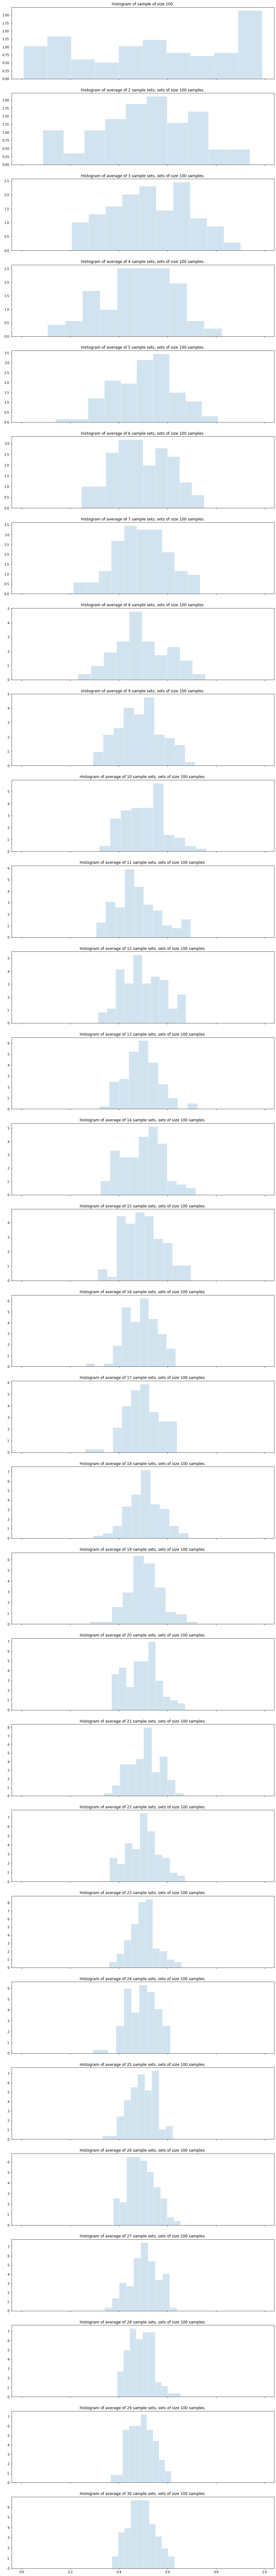

In [7]:
plot_samples(100,30, bins = 10)

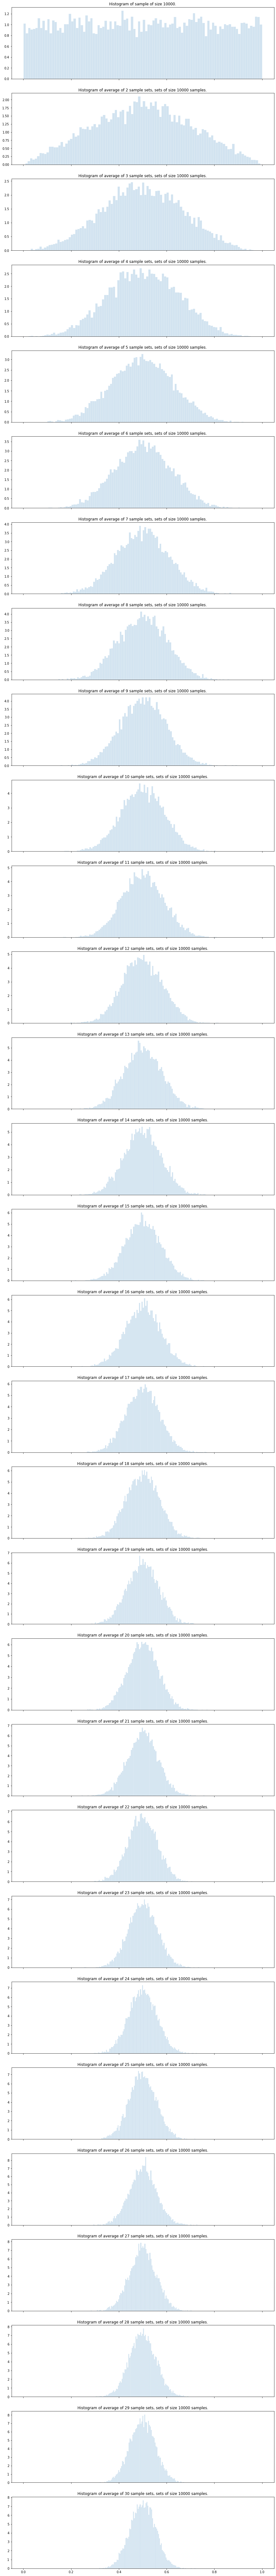

In [8]:
plot_samples(10 ** 4,30, bins = 100)